# Synergy Logistics

In [122]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

## Opcion 1. Enfocarse a 10 rutas mas demandadas

In [205]:
data = pd.read_csv('synergy.csv',index_col=0) #linea para importar base de datos csv
paises_origen=list(set(data['origin']))
paises_origen.sort()
paises_destino=list(set(data['destination']))
paises_destino.sort()

#matriz para contar rutas, columnas=destino, indice=origen
rutas = pd.DataFrame(0,index=paises_origen, columns=paises_destino)  
#matriz para sumar valor
valor_ruta = pd.DataFrame(0,index=paises_origen, columns=paises_destino) 
for fila in data.index: # por cada elemento de la base de datos
    origen = data['origin'][fila]
    destino = data['destination'][fila]
    rutas[destino][origen] = rutas[destino][origen] +1 # se recorre arreglo [columnas][indice]
    valor_ruta[destino][origen] = valor_ruta[destino][origen] + data['total_value'][fila]
   # print(rutas[origen][destino])        


In [206]:
valor_ruta

,Argentina,Austria,Belgium,Belorussia,Brazil,Canada,China,Croatia,France,Germany,...,Slovakia,South Korea,Spain,Switzerland,Thailand,Turkey,USA,United Arab Emirates,United Kingdom,Vietnam
Australia,0,0,0,0,172000000,0,0,0,0,0,...,0,0,0,0,337000000,0,0,0,220000000,0
Austria,0,0,0,0,0,0,0,0,93000,188000,...,258000,0,0,252000,0,0,112000,0,0,0
Belgium,0,0,0,0,0,0,0,0,343000000,302000000,...,0,0,0,0,0,0,0,0,1632000000,0
Brazil,465000000,0,0,0,0,0,799000000,0,0,76000000,...,0,0,0,0,0,0,272000000,0,0,0
Canada,0,0,0,0,206000000,0,693000000,0,0,0,...,0,0,0,0,0,0,1209000000,0,163000000,0
China,1236000000,0,524000000,0,785000000,0,0,0,0,4090000000,...,0,4790000000,1862000000,0,3831000000,0,4094000000,3357000000,0,0
France,0,7000,5538069000,0,0,75000,54000,0,0,2226035000,...,0,0,1455058000,0,0,0,3402000000,0,5427000000,0
Germany,0,0,0,0,3265000,25178000,3495875000,0,2902214000,0,...,0,902668000,0,0,0,0,795446000,0,2635000,0
India,0,0,0,0,0,0,761000000,0,0,137000000,...,0,0,0,0,0,0,474000000,1037000000,0,0
Italy,0,0,0,0,0,66000,0,699000000,469060000,1415088000,...,0,0,871108000,643094000,0,0,107000,0,706038000,0


In [426]:
numero_rutas=[]
valor_ruta_total = []
origenes=[]
destinos=[]
for origen in rutas.index:
    for destino in rutas.columns:
        if rutas[destino][origen]== 0:
            continue
        numero_rutas.append(rutas[destino][origen])
        valor_ruta_total.append(valor_ruta[destino][origen])
        origenes.append(origen)
        destinos.append(destino)
        
orden_rutas=pd.DataFrame(columns=['Origen','Destino','Registros','Valor_ruta']) #DAtaframe de Rutas
orden_rutas.Origen = origenes
orden_rutas.Destino = destinos
orden_rutas.Registros = numero_rutas
orden_rutas.Valor_ruta = valor_ruta_total
#orden_rutas.set_index('Origen')
len(orden_rutas)
orden_rutas

mayor_demanda = orden_rutas.sort_values(by='Registros',ascending=False)
print(mayor_demanda[:10].to_latex(index=False))
operaciones_rutas=mayor_demanda[:10]['Registros'].sum()
print(mayor_demanda[:10].Valor_ruta.sum(),data['total_value'].sum(),mayor_demanda[:10].Valor_ruta.sum()/data['total_value'].sum(),operaciones_rutas )

\begin{tabular}{llrr}
\toprule
     Origen &     Destino &  Registros &  Valor\_ruta \\
\midrule
South Korea &     Vietnam &        497 &  6877007000 \\
Netherlands &     Belgium &        437 &  3238142000 \\
        USA & Netherlands &        436 &  1032187000 \\
      Japan &      Mexico &        385 &  5829000000 \\
      China &      Mexico &        351 & 12494000000 \\
      China &       Japan &        343 &  5891000000 \\
    Germany &       China &        328 &  3495875000 \\
      Japan &      Brazil &        306 &  3368155000 \\
    Germany &      France &        299 &  2902214000 \\
South Korea &       Japan &        294 &  4741000000 \\
\bottomrule
\end{tabular}

49868580000 215691298000 0.2312034860117537 3676


[]

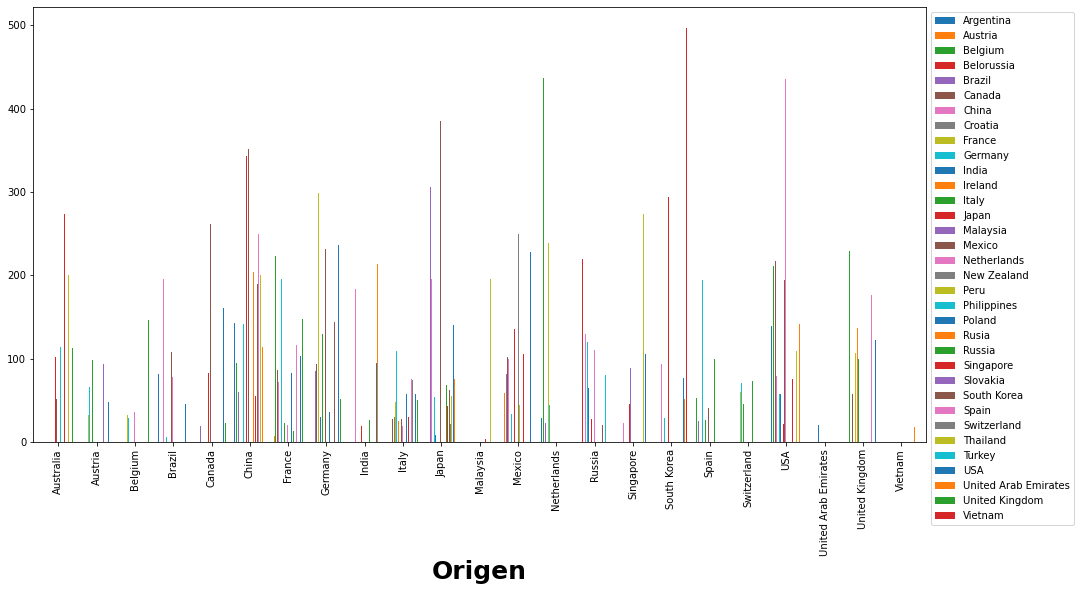

In [154]:
ax = rutas.plot.bar(figsize=(16,8),width=0.8)
ax.set_xlabel('Origen',fontsize=25,fontweight='bold')
ax.legend(bbox_to_anchor=(1.0,1.0))
ax.plot()

## 2.Reduciendo un medio de trasnporte

In [428]:
medios = list(set(data.transport_mode))
orden_medios=pd.DataFrame(0,index=medios,columns=['Registros','Valor_total'])
for fila in data.index:
    medio_fila=data['transport_mode'][fila]
    orden_medios['Registros'][medio_fila]=orden_medios['Registros'][medio_fila]+1 # contar incidencias para cada medio
    orden_medios['Valor_total'][medio_fila] = orden_medios['Valor_total'][medio_fila] + data['total_value'][fila] #sumar el valor de ese registro
print(medios)
print(orden_medios.to_latex())
valor_sin_road=orden_medios['Valor_total'].sum()-orden_medios['Valor_total']['Road']
operaciones_sin_road=orden_medios['Registros'].sum()-orden_medios['Registros']['Road']
print(valor_sin_road,operaciones_sin_road)

['Rail', 'Air', 'Road', 'Sea']
\begin{tabular}{lrr}
\toprule
{} &  Registros &   Valor\_total \\
\midrule
Rail &       3381 &   43628043000 \\
Air  &       2389 &   38262147000 \\
Road &       2598 &   33270486000 \\
Sea  &      10688 &  100530622000 \\
\bottomrule
\end{tabular}

182420812000 16458


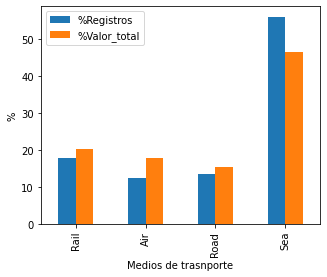

In [230]:
orden_medios_po = pd.DataFrame(0,index=medios,columns=['%Registros','%Valor_total']) 
orden_medios_po['%Registros'] = orden_medios['Registros']/orden_medios['Registros'].sum()*100
orden_medios_po['%Valor_total'] = orden_medios['Valor_total']/orden_medios['Valor_total'].sum()*100
orden_medios_po
#print(orden_medios['Registros'].sum(),orden_medios['Valor_total'].sum())

fig = orden_medios_po.plot.bar(ylabel='%',xlabel='Medios de trasnporte',figsize=(5,4))

fig.figure.savefig('medios_transporte.png')

## 3. Enfocarse en 80% del valor total

In [401]:
data_mayor_valor = data.sort_values(by='total_value',ascending=False) #ordenar datos por mayor valor
valor_total = data['total_value'].sum()  #100 % valor
print(valor_total)  
data_mayor_valor

215691298000


,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
5646,Exports,France,USA,2016,20/02/16,Cosmetics,Sea,Klorane Corp,285000000
5502,Exports,Netherlands,Belgium,2015,01/03/15,Meat,Road,Meat Beleggingen Bv,229000000
6098,Exports,France,Belgium,2019,19/02/19,Cosmetics,Road,L Oreal Co,148000000
6154,Exports,France,Belgium,2019,16/04/19,Pharmaceuticals,Road,Cubist Pharma F,142000000
814,Exports,China,Mexico,2020,25/03/20,Computers,Air,Lenovo Group Ltd,140000000
...,...,...,...,...,...,...,...,...,...
13143,Exports,France,Belgium,2017,05/07/17,Pharmaceuticals,Rail,Cubist Pharma F,0
13144,Exports,France,Belgium,2018,03/02/18,Pharmaceuticals,Rail,Cubist Pharma F,0
13147,Exports,France,Belgium,2018,07/02/18,Pharmaceuticals,Rail,Cubist Pharma F,0


In [327]:
suma_valores = 0  #sumador para llegar a 80%
indice = 0 #contador de registros
for fila in data_mayor_valor.index:
    suma_valores = suma_valores + data_mayor_valor['total_value'][fila] #sumar el valor de cada registro hasta llegar a 80%
    indice=indice+1
    if (suma_valores/valor_total >= 0.8):
        break
print(suma_valores, valor_total, suma_valores/valor_total,indice) #cuantas operaciones se necesitan, y cuanto valor equivale
print(data_mayor_valor[:indice].total_value.sum())

172560000000 215691298000 0.800032275757365 5770
172560000000


In [328]:
data80=data_mayor_valor[:indice] #pasar esas oepraciones a un nuevo arreglo. 
paises_origen = set(data80['origin'])
paises_destino= set(data80['destination'])
paises_80 = paises_destino.union(paises_origen) #paises presentes en el 80% de valor
print(paises_origen.intersection(paises_destino), len(paises_origen.intersection(paises_destino)),'\n\n destino-origen', paises_destino.difference(paises_origen),len(paises_destino),'\n\n' ,paises_80, len(paises_80))
paises_80p =list(paises_80)
paises_80p.sort()

{'South Korea', 'Vietnam', 'China', 'Switzerland', 'Belgium', 'India', 'Singapore', 'Canada', 'Mexico', 'United Kingdom', 'Netherlands', 'Brazil', 'Italy', 'France', 'Japan', 'Russia', 'Spain', 'Germany', 'USA', 'United Arab Emirates'} 20 

 destino-origen {'Ireland', 'Poland', 'Rusia', 'Argentina', 'Croatia', 'Philippines', 'Belorussia', 'Turkey', 'Thailand'} 29 

 {'South Korea', 'Croatia', 'Belorussia', 'Vietnam', 'Turkey', 'Rusia', 'Argentina', 'Switzerland', 'China', 'Belgium', 'India', 'Singapore', 'Australia', 'Canada', 'Poland', 'Mexico', 'United Kingdom', 'Brazil', 'Netherlands', 'Italy', 'Ireland', 'Philippines', 'Japan', 'France', 'Spain', 'Germany', 'USA', 'Russia', 'United Arab Emirates', 'Thailand', 'Malaysia'} 31


In [404]:
numero_paises = pd.DataFrame(0,index= paises_80p, columns=['origin', 'destino','total_origen','total_destino']) # arreglo de países con sus operaciones y valor
for fila in data80.index:
    orig = data80['origin'][fila]
    dest = data80['destination'][fila]
    valor = data80['total_value'][fila]
    numero_paises['origin'][orig] = numero_paises['origin'][orig] +1
    numero_paises['destino'][dest] = numero_paises['destino'][dest] +1
    numero_paises['total_origen'][orig] = numero_paises['total_origen'][orig] + valor
    numero_paises['total_destino'][dest] = numero_paises['total_destino'][dest] + valor    
numero_paises['valor_promedio'] = (numero_paises['total_origen'] + numero_paises['total_destino'])/(2*valor_total) #promedio de valor de importaciones y exportaciones
numero_paises['%valor_origen'] = numero_paises['total_origen']/valor_total
numero_paises['%valor_destino'] = numero_paises['total_destino']/valor_total
orden_paises_valor = numero_paises.sort_values(by=('valor_promedio'),ascending=False) #ordenar en base al promedio
numero_paises['valor_promedio'].sum()
orden_paises_valor

,origin,destino,total_origen,total_destino,valor_promedio,%valor_origen,%valor_destino
China,1176,336,40360000000,8702000000,0.113732,0.187119,0.040345
Mexico,172,895,4146000000,33797000000,0.087957,0.019222,0.156692
USA,728,466,19517000000,14114000000,0.077961,0.090486,0.065436
Japan,574,485,16366000000,11508000000,0.064615,0.075877,0.053354
Germany,418,452,12920000000,13789000000,0.061915,0.059900,0.063929
France,492,134,18817000000,3922000000,0.052712,0.087240,0.018183
South Korea,589,201,14559000000,6251000000,0.048240,0.067499,0.028981
Belgium,65,303,1693000000,10504000000,0.028274,0.007849,0.048699
Russia,383,41,11061000000,1014000000,0.027991,0.051282,0.004701
Thailand,0,464,0,11949000000,0.027699,0.000000,0.055399


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


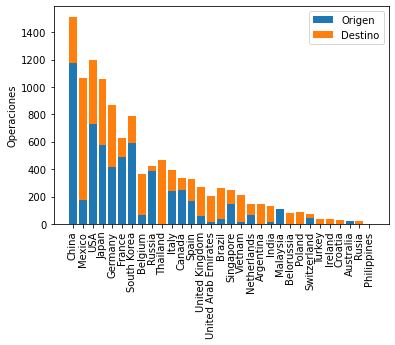

In [418]:
#graficar por cantidad de operaciones
plt.bar(orden_paises_valor.index, orden_paises_valor['origin'], label='Origen')
plt.bar(orden_paises_valor.index, orden_paises_valor['destino'], label='Destino',bottom=orden_paises_valor['origin'])
plt.ylabel('Operaciones')
plt.legend()
plt.xticks(rotation=90);
plt.savefig('Operaciones_oden.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


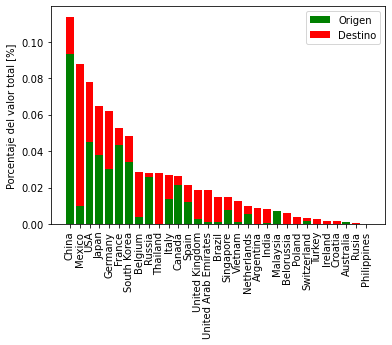

In [419]:
plt.bar(orden_paises_valor.index, orden_paises_valor['%valor_origen']/2, label='Origen', color= 'green')
plt.bar(orden_paises_valor.index, orden_paises_valor['%valor_destino']/2,color='red',label='Destino',bottom=orden_paises_valor['%valor_origen']/2)
plt.ylabel('Porcentaje del valor total [%]')
plt.legend()
plt.xticks(rotation=90);
plt.savefig('Operaciones_valor_orden.eps')

## Comparación de 3 estrategias

In [435]:
comparacion = pd.DataFrame(index=['base','10rutas','eliminarmedio','80%'],columns=['Valor','Operaciones','ratio'])
comparacion['Valor'] = [valor_total,mayor_demanda[:10].Valor_ruta.sum(), valor_sin_road,data80.total_value.sum()]
comparacion['Operaciones'] = [len(data),operaciones_rutas,operaciones_sin_road,indice ]
comparacion['ratio'] = comparacion['Valor']/comparacion['Operaciones']
comparacion
print(comparacion.to_latex())
print((len(data)-indice)/len(data))

\begin{tabular}{lrrr}
\toprule
{} &         Valor &  Operaciones &         ratio \\
\midrule
base          &  215691298000 &        19056 &  1.131881e+07 \\
10rutas       &   49868580000 &         3676 &  1.356599e+07 \\
eliminarmedio &  182420812000 &        16458 &  1.108402e+07 \\
80\%           &  172560000000 &         5770 &  2.990641e+07 \\
\bottomrule
\end{tabular}

0.697208228379513


In [86]:
data

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
